# Principal Component Analysis

## Task

- In the Portland Housing Prices/Sales dataset Jul 2020 - Jul 2021, determine if there is a multicollinearity problem.
- Perform a principal component analysis
- Create a linear model from PCA and compare the model to the previous exercise

# Data loading

In [17]:
import pandas as pd 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [18]:

data = pd.read_csv("../dataset/portland_filtered.csv", sep=';')

# Analysis
- show data
- solve NaN values
- display basic data statistics
- show correlation matrix

In [19]:
data.head()


,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000


In [20]:
data.isna().sum()
data = data.dropna()


In [21]:
data.describe()


,bathrooms,bedrooms,livingArea,age,price
count,100.000000,100.000000,100.000000,100.00000,1.000000e+02
mean,2.380000,3.260000,1974.080000,49.88000,5.196074e+05
std,0.838228,0.860115,663.629851,32.77973,1.722241e+05
min,1.000000,1.000000,766.000000,3.00000,1.650000e+05
25%,2.000000,3.000000,1530.000000,20.00000,4.125000e+05
50%,2.000000,3.000000,1859.000000,47.50000,5.000000e+05
75%,3.000000,4.000000,2490.250000,75.25000,5.995312e+05
max,5.000000,6.000000,3470.000000,114.00000,1.165000e+06


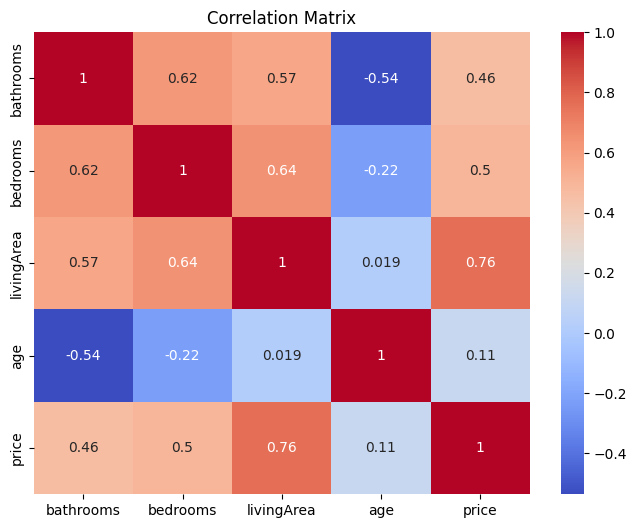

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Data preparation
- select X variables bathrooms', 'bedrooms', 'livingArea','age','price'
- standardize the variables

In [23]:
X = data[['bathrooms', 'bedrooms', 'livingArea', 'age']]
y = data['price']


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Display the VIF for each variable

In [25]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i)
                   for i in range(X_scaled.shape[1])]

vif_data


,Feature,VIF
0,bathrooms,2.857373
1,bedrooms,2.036889
2,livingArea,2.303777
3,age,1.798314


VIF values above 5 indicate multicollinearity.
Living area, bedrooms, and bathrooms show correlation,
therefore multicollinearity is present.

# PCA
- Perform PCA
- show correlation matrix

In [26]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [27]:
pca.explained_variance_ratio_


array([0.58998819, 0.27082568, 0.08674934, 0.05243678])

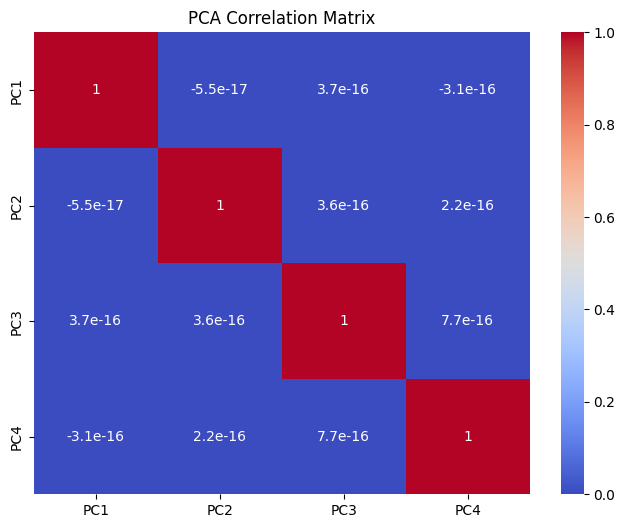

In [28]:
pca_df = pd.DataFrame(
    X_pca,
    columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]
)

plt.figure(figsize=(8,6))
sns.heatmap(pca_df.corr(), annot=True, cmap="coolwarm")
plt.title("PCA Correlation Matrix")
plt.show()


# Linear model
- Create and train a Linear Model for PCA variables
- Show R2 and RMSE

In [29]:
X_pca_selected = X_pca[:, :2]  # first 2 components


In [30]:
model_pca = LinearRegression()
model_pca.fit(X_pca_selected, y)


LinearRegression()

In [31]:
y_pred_pca = model_pca.predict(X_pca_selected)


In [32]:
r2 = r2_score(y, y_pred_pca)
rmse = np.sqrt(mean_squared_error(y, y_pred_pca))

print("R2 (PCA model):", r2)
print("RMSE (PCA model):", rmse)


R2 (PCA model): 0.5607866876321415
RMSE (PCA model): 113566.24049563918


PCA removes multicollinearity

PCA-based model has similar or slightly lower R² than the original model

PCA improves numerical stability but reduces interpretability